Обзор Astropy, Astroquery на примерах данных спутника Gaia и фотометрического обзора Pan-STARRS

Исследование направлено на GD-1 - звездный поток вокруг Млечного пути. Это сгусток, находящийся за пределами нашей галактики.
Предположительно - это остаток от краликовой галактики, которую Млечный Путь захватили разорвал. В межгалактическом пространстве бОльшую роль начинает играть Темная Материя, и как раз такие скопления помогают обнаружить ее проявлене. В рассматриваемом потоке заметны разрывы, что интерпретируется как влияние Тёмной Материи, Её сгустков, проходящих вблизи поток. Если GD-1 действительно был карликовой галактикой, то изучение его орбиты и выявление массы поможет нам измерить массу Млечного пути, что поможет в изучении эволюции галактик.  

Данные уроки можно пройти примерно за 10 часов. Они охватиывают следующие темы:
- Создание сложных запросов ADQL, SQL
- Использование Astroquery для запроса удаленного сервера
- Преобразование координат между общими системами коордианат с использование единиц и координат Astropy
- Работа с распространенными астрономическими форматами файлов таких как FITS, HDF5, CSV
- Управаление данными с помощью Panda DataFrames и Astropy Tables
- Написание функций для воспроизводимости работы
- Создание воспроизводимого рабочего процесса, который переводит вычисления в данные
- Настройка элементов для создания комплексных, многоплановых графиков публикационного качества

Предполагается, что у Вас есть базовые знание Python и некоторый опыт работы с оболочкой Bash. Так же, предполагается, что у Вас есть некоторое представление об астрономических понятиях, включая системы отсчета, собственное движение, диаграммы цвет-величина, шаровые скопления и изохроны. 

Сперваа проведем начальную настройку окружения. Уроки написаны в Jupyter Notebook, так ккак это самая комфортная оболочка для работы в Data Science.
Скачиваем https://figshare.com/ndownloader/files/35777540 и разархивируем содержимое в директорию, называемую student_download
Это кастомное окружение, предназначенное для этих уроков. Оно содержит необходимые библиотеки и модули.
Для корректной установки и работы стоит использовать Anaconda, с целью создания нового Conda-окружения. 

В Терминале или Jupyter Prompt убедитесь, что находитесь в директории student_download и выполните:

Для проверки работоспособности окружения запустите test_setup.ipynb
Запускаем в нем все ячейки, содержащие import с целью убедиться в отсутствии ошибок.

WARNING - допустимы, это не ошибки

Если с импортом возникли проблемы, закройте Jupyter и запустите следующую команду в Anaconda:

Теперь после открытия notebook заходим в Kernel menu –> Change Kernel –> выбираем AstronomicalData
Это обеспечит доступность соответствующих пакетов.

УРОК 1
ПРОСТЫЕ ЗАПРОСЫ

Вопросы:
Как нам выбрать и загрузить необходимые данные с сервера Gaia?

Цели:
- Составление простых ADQL/SQL запросов
- Использование запросов для обзора баз данных и соответствующих им таблиц
- Использование запросов для скачивания данных
- Разработка, тестировние и отладка запроса

Что бы загрузить данные с сервера Gaia необходимо выполнить следующие шаги:
- Установить соединение с сервером Gaia
- Изучить информации о базе данных и таблицах
- Написать запрос и отправить его на сервер
- Загруить ответ с сервера

Для отправки заапросов исполюзуется ADQL - Astronomical Data Query Language - Язык Запросов Астрономических Данных. Это диалект SQL, а потому, если вы обладаете знаниями в SQL - вы обладаете ими и в ADQL. Справочное руководство по ADQL: https://www.gaia.ac.uk/data/gaia-data-release-1/adql-cookbook

Библеотека, которую мы будем использовать для получения данных Gaia называется Astroquery https://astroquery.readthedocs.io/en/latest/

https://astroquery.readthedocs.io/en/latest/gaia/gaia.html


In [1]:
from astroquery.gaia import Gaia

Gaia работает с базой данных, база данных это сборник таблиц (хотя бы одной).
Каждая таблица - двумерный массив с одной или несколькими проименованными колонками
Нам необходимы назваания таблиц из базы данных Gaia. Сперва мы выгрузим только названия таблиц, без их содержания:

In [2]:
tables = Gaia.load_tables(only_names=True)

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]


In [3]:
#Теперь введем названия таблиц при помощи цикла for
for table in tables:
    print(table.name)

external.apassdr9
external.gaiadr2_astrophysical_parameters
external.gaiadr2_geometric_distance
external.gaiaedr3_distance
external.gaiaedr3_gcns_main_1
external.gaiaedr3_gcns_rejected_1
external.gaiaedr3_spurious
external.galex_ais
external.ravedr5_com
external.ravedr5_dr5
external.ravedr5_gra
external.ravedr5_on
external.ravedr6
external.sdssdr13_photoprimary
external.skymapperdr1_master
external.skymapperdr2_master
external.tmass_xsc
gaiadr1.aux_qso_icrf2_match
gaiadr1.ext_phot_zero_point
gaiadr1.allwise_best_neighbour
gaiadr1.allwise_neighbourhood
gaiadr1.gsc23_best_neighbour
gaiadr1.gsc23_neighbourhood
gaiadr1.ppmxl_best_neighbour
gaiadr1.ppmxl_neighbourhood
gaiadr1.sdss_dr9_best_neighbour
gaiadr1.sdss_dr9_neighbourhood
gaiadr1.tmass_best_neighbour
gaiadr1.tmass_neighbourhood
gaiadr1.ucac4_best_neighbour
gaiadr1.ucac4_neighbourhood
gaiadr1.urat1_best_neighbour
gaiadr1.urat1_neighbourhood
gaiadr1.cepheid
gaiadr1.phot_variable_time_series_gfov
gaiadr1.phot_variable_time_series_gfov_

Как видим - тут много таблиц. Мы будем использовать следующие:
- gaiadr2.gaia_source, который содержит данные Gaia из выпуска данных 2
- gaiadr2.panstarrs1_original_valid, который содержит данные фотометрии, которые мы будем использовать из PanSTARRS
- gaiadr2.panstarrs1_best_neighbour, который мы будем использовать для сопоставления каждой звезды, наблюдаемой Gaia, с той же звездой, наблюдаемой PanSTARRS.

Мы можем использовать load_table (не load_tables), чтобы получить метаданные для одной таблицы. 
Название этой функции вводит в заблуждение, поскольку она загружает только метаданные, а не содержимое таблицы.

In [4]:
table_metadata = Gaia.load_table('gaiadr2.gaia_source')
table_metadata

Retrieving table 'gaiadr2.gaia_source'


In [5]:
#Jupyter показывает, что результатом является объект типа TapTableMeta, но не отображает содержимое.
print(table_metadata)

TAP Table name: gaiadr2.gaiadr2.gaia_source
Description: This table has an entry for every Gaia observed source as listed in the
Main Database accumulating catalogue version from which the catalogue
release has been generated. It contains the basic source parameters,
that is only final data (no epoch data) and no spectra (neither final
nor epoch).
Num. columns: 95


In [6]:
#Следующий цик выводит названия колонок таблицы
for column in table_metadata.columns:
    print(column.name)

solution_id
designation
source_id
random_index
ref_epoch
ra
ra_error
dec
dec_error
parallax
parallax_error
parallax_over_error
pmra
pmra_error
pmdec
pmdec_error
ra_dec_corr
ra_parallax_corr
ra_pmra_corr
ra_pmdec_corr
dec_parallax_corr
dec_pmra_corr
dec_pmdec_corr
parallax_pmra_corr
parallax_pmdec_corr
pmra_pmdec_corr
astrometric_n_obs_al
astrometric_n_obs_ac
astrometric_n_good_obs_al
astrometric_n_bad_obs_al
astrometric_gof_al
astrometric_chi2_al
astrometric_excess_noise
astrometric_excess_noise_sig
astrometric_params_solved
astrometric_primary_flag
astrometric_weight_al
astrometric_pseudo_colour
astrometric_pseudo_colour_error
mean_varpi_factor_al
astrometric_matched_observations
visibility_periods_used
astrometric_sigma5d_max
frame_rotator_object_type
matched_observations
duplicated_source
phot_g_n_obs
phot_g_mean_flux
phot_g_mean_flux_error
phot_g_mean_flux_over_error
phot_g_mean_mag
phot_bp_n_obs
phot_bp_mean_flux
phot_bp_mean_flux_error
phot_bp_mean_flux_over_error
phot_bp_mean_ma

Конечно, можно сделать некоторые выводы, из названий котолонок, но лучше не поддаваться искушению и посмотреть документацию 
https://gea.esac.esa.int/archive/documentation/GDR2/Gaia_archive/chap_datamodel/sec_dm_main_tables/ssec_dm_gaia_source.html

Одна из таблиц. которые мы будем использовать - gaiadr2.panstarrs1_original_valid
Сразу при помощи load_table получим метаданные этой таблицы. 

In [7]:
panstarrs_metadata = Gaia.load_table('gaiadr2.panstarrs1_original_valid')
print(panstarrs_metadata)

Retrieving table 'gaiadr2.panstarrs1_original_valid'
TAP Table name: gaiadr2.gaiadr2.panstarrs1_original_valid
Description: The Panoramic Survey Telescope and Rapid Response System (Pan-STARRS) is
a system for wide-field astronomical imaging developed and operated by
the Institute for Astronomy at the University of Hawaii. Pan-STARRS1
(PS1) is the first part of Pan-STARRS to be completed and is the basis
for Data Release 1 (DR1). The PS1 survey used a 1.8 meter telescope and
its 1.4 Gigapixel camera to image the sky in five broadband filters (g,
r, i, z, y).

The current table contains a filtered subsample of the 10 723 304 629
entries listed in the original ObjectThin table.
We used only ObjectThin and MeanObject tables to extract
panstarrs1OriginalValid table, this means that objects detected only in
stack images are not included here. The main reason for us to avoid the
use of objects detected in stack images is that their astrometry is not
as good as the mean objects astrometry: “T

In [8]:
for column in panstarrs_metadata.columns:
    print(column.name)

obj_name
obj_id
ra
dec
ra_error
dec_error
epoch_mean
g_mean_psf_mag
g_mean_psf_mag_error
g_flags
r_mean_psf_mag
r_mean_psf_mag_error
r_flags
i_mean_psf_mag
i_mean_psf_mag_error
i_flags
z_mean_psf_mag
z_mean_psf_mag_error
z_flags
y_mean_psf_mag
y_mean_psf_mag_error
y_flags
n_detections
zone_id
obj_info_flag
quality_flag


Написание запросов

Эти таблицы достаточно массивны, сперва кажется что они запутанны. поэтому у нас есть такой инструмент как Написание запросов (Query)
Они пишутся на языке запросов по типу SQL, для базы данных Gaia язык запросов называется ADQL
Вот пример простого запроса:

In [9]:
query1 = """SELECT 
TOP 10
source_id, ra, dec, parallax 
FROM gaiadr2.gaia_source
"""

Как выдите, мы используем тройные кавычки. Это позволяет делать разрывы в строках запросов и делает более удобным запрос для чтения.

Слова в верхнем регистре - ключевые слова языка ADQL:
- SELECT определяет данные которые мы выбраем для работы (в отличии от добавления или изменения данных)
- TOP определяет количество и положение строк, которые мы выбрали для работы, в данном случае ВЕРХНИЕ 10, что весьма полезно для тестирования запросов при слишком больших объемах.
- FROM определяет таблицу, из который мы выбираем данные

Триетья строка в азапросе - названия колонок, которые нам необходимы. В этом примере ключевые слова написаны заглавными буквами, а названия колонок строчными. Это стандартный, но не обязательный формат.ADQL и SQL не чувствительны к регистру. Так же, разбивание запроса на несколько линий облегчает его читаемость и не влияет на работоспособность, то есть не является обязательным.

Что бы запустить это запрос, мы используем объект Gaia, который представляет собой подключение к базе данных Gaia, и вызывает launch_job:

In [10]:
job1= Gaia.launch_job(query1)
job1

Результатом является объект, представляющий задание, работающее на сервере Gaia.

Если вы распечатываете его, он отобразит метаданные для предстоящих результатов.

In [11]:
print(job1)

<Table length=10>
   name    dtype  unit                            description                             n_bad
--------- ------- ---- ------------------------------------------------------------------ -----
source_id   int64      Unique source identifier (unique within a particular Data Release)     0
       ra float64  deg                                                    Right ascension     0
      dec float64  deg                                                        Declination     0
 parallax float64  mas                                                           Parallax     2
Jobid: None
Phase: COMPLETED
Owner: None
Output file: 1687975495087O-result.vot.gz
Results: None


Не беспокойстесь по поводу сообщения Results: None. Это не означает, что нет результатов. Однако, Phase: COMPLETED показывает, что задание выполнено, так что мы можем получить результаты при помощи следующей команды:

In [12]:
results1 = job1.get_results()
type(results1)

astropy.table.table.Table

Функция type показывает, что результат - это таблица Astropy 

Почему слово table повторяется три раза? Первое - названия модуля, второе - название подмодуля и третье - название класса. В большинстве случаев, нас должно волнолвать только последнее.

Таблица Astropy похожа на таблицу баз данных SQL за исключениями:

- База данных SQL хранится на диске, потому является постоянным; то есть они «выживают», даже если вы выключите компьютер. Астрономическая таблица хранится в памяти; он исчезает, когда вы выключаете компьютер (или блокнот Jupyter).

- Базы данных SQL предназначены для обработки запросов. Таблица Astropy может выполнять некоторые операции, подобные запросам, такие как выбор столбцов и строк. Но эти операции используют синтаксис Python, а не SQL.

Jupyter знает как отобразить содержание таблиц.


In [13]:
results1

source_id,ra,dec,parallax
,deg,deg,mas
int64,float64,float64,float64
6003880980035379968,229.13089822047718,-43.02581312460428,0.5678632410282545
6003866445854787968,229.31420053915156,-43.194653077141936,-1.9663027333114225
6003885240630732160,229.02182043919257,-42.959968910752124,0.05913310799879218
6003877715850781056,229.52605900646415,-42.87034807979608,--
6003873420882265728,229.5318187544946,-43.03401463248013,0.6393423077098697
6003848991112002944,227.59379103950235,-42.18991486206252,--
6003871183209010816,229.4837365818544,-43.137003219815604,-0.17001733125893384
6003855240290934656,227.96526362474262,-42.02764681596658,0.25245402183996984


Каждая колонка обладает названием, видом единиц и типом данных.
Например, вид единиц ra и dec это градусная мера, и тип данных - float64, что обозначает 64-разрядное число с плавающей точкой, которая используется для хранения измерений с дробной частью.
Эта информация пришла из базы данных Gaia и отсортирована в таблицу Astropy при помощи Astrpquery.

Изменяя запрос, мы пможем получить различные данных, например, добавляяя в список названий колонок radial_velocity (радиальная скорость) Спектроскопическая лучевая скорость в солнечной барицентрической системе отсчета. Предоставленная лучевая скорость является медианным значением измерений лучевой скорости во все эпохи.

In [14]:
query1_with_rv = """SELECT 
TOP 10
source_id, ra, dec, parallax, radial_velocity
FROM gaiadr2.gaia_source
"""
job1_with_rv = Gaia.launch_job(query1_with_rv)
results1_with_rv = job1_with_rv.get_results()
results1_with_rv

source_id,ra,dec,parallax,radial_velocity
,deg,deg,mas,km / s
int64,float64,float64,float64,float64
6003880980035379968,229.13089822047718,-43.02581312460428,0.5678632410282545,--
6003866445854787968,229.31420053915156,-43.194653077141936,-1.9663027333114225,--
6003885240630732160,229.02182043919257,-42.959968910752124,0.05913310799879218,--
6003877715850781056,229.52605900646415,-42.87034807979608,--,--
6003873420882265728,229.5318187544946,-43.03401463248013,0.6393423077098697,--
6003848991112002944,227.59379103950235,-42.18991486206252,--,--
6003871183209010816,229.4837365818544,-43.137003219815604,-0.17001733125893384,--
6003855240290934656,227.96526362474262,-42.02764681596658,0.25245402183996984,--


Асинхронные запросы

launch_job просит сервер обрабатывать запрос "синхронно", что означает запуск незамедлительно. Но синхронные запросы ограничиваются двумя тысячами строк. Для получения бОльшего количества строк необходим "асинхронный" запуск, следовательно - для такого запроса потребуется больше времени.

Если нет уверенности в том, сколько строк будет возвращено запросом, можно использовать команду SQL - COUNT, что убы узнать заранее их количество. Это мы и рассмотрим на следующим примере.

Результат асинхронного запроса сортирован в файле на сервере, так что можно запустить запрос и вернуться к нему после для получения результатов. Для аннонимных пользователей: файлы хранятся в течении трех дней.
Для примера, попробуем запостить запрос похожий на query1, но с небольшими изменениями:
- Выберем первые 3000 строк, что уже превышает возможности синхронного запроса
- Выберем дополнительные две колонки pmra и pmdec, определяющие собственное движение (proper motion) вдоль осей ra и dec.
- Будем использовать новое ключевое слово WHERE

In [15]:
query2 = """SELECT 
TOP 3000
source_id, ra, dec, pmra, pmdec, parallax
FROM gaiadr2.gaia_source
WHERE parallax < 1
"""

Слово WHERE уточняет, какие строки нам нужны; в этом случае запрос выбирает только строки, «где» параллакс меньше 1. Это приводит к выбору звезд с относительно низким параллаксом, которые находятся дальше. Мы будем использовать этот пункт, чтобы исключить ближайшие звезды, которые вряд ли будут частью GD-1. 

WHERE - одно из самых распространенных ключевых слов в ADQL/SQL, и одно из самых действенных, потомучто оно позволяет загрузить только те строкаи. которые нам необходимы из базы данных.

Мы используем launch_job_async для отправки асинхронного запроса.

In [16]:
job2 = Gaia.launch_job_async(query2)
job2

INFO: Query finished. [astroquery.utils.tap.core]


In [17]:
#И здесь наши результаты
results2 = job2.get_results()
results2

source_id,ra,dec,pmra,pmdec,parallax
,deg,deg,mas / yr,mas / yr,mas
int64,float64,float64,float64,float64,float64
6003880980035379968,229.13089822047718,-43.02581312460428,-3.3595278108109152,-3.3800329066443675,0.5678632410282545
6003866445854787968,229.31420053915156,-43.194653077141936,3.309048488651408,-2.3823481427464737,-1.9663027333114225
6003885240630732160,229.02182043919257,-42.959968910752124,-7.080322843702692,-7.9890513194970305,0.05913310799879218
6003873420882265728,229.5318187544946,-43.03401463248013,-0.2420567139477341,-3.485635304011467,0.6393423077098697
6003871183209010816,229.4837365818544,-43.137003219815604,6.20526540955227,-0.6857521317382589,-0.17001733125893384
6003855240290934656,227.96526362474262,-42.02764681596658,-8.318987249408174,-4.5793165991727385,0.25245402183996984
6003881491130867584,229.24491522530585,-43.03133972332596,-9.34252517382102,-9.62899402276237,0.12831949500515788
6003845383346509440,227.65075890026068,-42.29309801336755,-0.8265307537083102,-4.374679087078775,0.3606529186312357


Можно заметить, что некоторые значения параллакса отрицательны. Как объясняется в этом FAQ 
https://www.cosmos.esa.int/web/gaia/archive-tips#negative%20parallax 
«отрицательные параллаксы вызваны ошибками в наблюдениях». Они «не имеют физического смысла», но могут быть «полезной диагностикой качества астрометрического решения».
Результаты запроса могут отличаться, так как мы получаем 3000 строк, которые не организованы каким либо образом.

Ключевые слова запроса должны располагаться в правильном порядке. Для примера можно вернуться ко второму запросу. Измененный запрос должен завершится ошибкой из которой мы не получим достаточно информации для отладки. По этой причине разработка и отладка запросов ADQL может быть очень сложной. Несколько советов, которые могут помочь:
- По возможности начинаем с рабочего запроса, будь то пример, найденный в сети, или запрос который был использован в прошлом.
- Вносим небольшое изменение и тестируем его.
- Во время отладки используем TOP для ограничения количества строк в запросе, что ускорит выполнение запроса.
- Синхронный запуск тестовых запросов также может ускорить их запуск.

Пример с неверным расположением ключевых слов:

In [18]:
query2_erroneous = """SELECT 
TOP 3000
WHERE parallax < 1
source_id, ref_epoch, ra, dec, parallax
FROM gaiadr2.gaia_source
"""

Операторы

В WHERE можно использовать любые операторы сравнения SQL такие как 
""">, <, >=, <=, !="""
Большинство из них такие же, как Python, но некоторые — нет. В частности, обратим внимание, что оператор равенства — это =, а не ==. Осторожно, чтобы Python не попал в ADQL!
Можно комбинировать сравнения, используя логические операторы:

И: верно, если оба сравнения верны
ИЛИ: верно, если одно или оба сравнения верны
Наконец, можно использовать НЕ, чтобы инвертировать результат сравнения.

Здесь
https://www.w3schools.com/sql/sql_operators.asp
инструкция по операторам SQL. После ознакомления, изменим предыдущий запрос, чтобы выбрать строки, где bp_rp находится в диапазоне от -0,75 до 2.
Это относительная фотометрическая величина. 

Примеры с операторами >, < и BETWEENequal

In [19]:
query2_sol1 = """SELECT 
TOP 10
source_id, ref_epoch, ra, dec, parallax
FROM gaiadr2.gaia_source
WHERE parallax < 1 
  AND bp_rp > -0.75 AND bp_rp < 2
"""

In [20]:
query2_sol2 = """SELECT 
TOP 10
source_id, ref_epoch, ra, dec, parallax
FROM gaiadr2.gaia_source
WHERE parallax < 1 
  AND bp_rp BETWEEN -0.75 AND 2
"""

bp_rp содержит BP-RP цаета, которые являются разницей между двумя колонками phot_bp_mean_mag и phot_rp_mean_mag. Об этих переменных можно прочитать здесь:
https://gea.esac.esa.int/archive/documentation/GDR2/Gaia_archive/chap_datamodel/sec_dm_main_tables/ssec_dm_gaia_source.html

Выбор звезд с bp-rp менее 2 исключает многие карликовые звезды класса М, которые имеют низкую температуру и малую светимость. Такую звезду на расстоянии GD-1 было бы трудно обнаружить, поэтому, если она будет обнаружена, она, скорее всего, окажется на переднем плане.
На этой диаграмме Герцшпрунга-Рассела показаны цвета BP-RP и светимость звезд в каталоге Gaia (Авторское право: ESA/Gaia/DPAC, CC BY-SA 3.0 IGO).

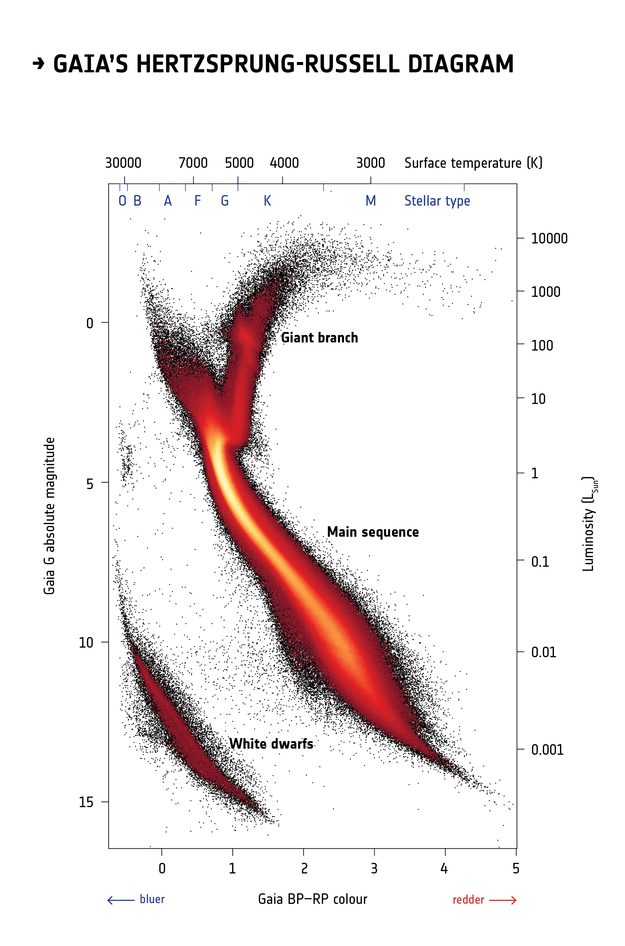

Форматирование запросов

Запросы, которые мы до сих пор писали, являются строковыми "литералами". Это означает, что вся строка является частью программы. Однако, самостоятельное написание запросов может быть медленным, повторяемым и подверженным ошибкам. Намного лучше написать код на Python для сбора запроса за Вас. Одним из таких методов является метод форматирования строк. В качестве примера разделим предыдущий запрос на две части; список названий столбцов и «база» для запроса, содержащая все, кроме имен столбцов.

Вот список столбцов, которые мы выберем и база - строка, содержащая спецификатор формата в фигурных скобках.

In [21]:
columns = 'source_id, ra, dec, pmra, pmdec, parallax'

query3_base = """SELECT 
TOP 10 
{columns}
FROM gaiadr2.gaia_source
WHERE parallax < 1
  AND bp_rp BETWEEN -0.75 AND 2
"""

Этот базовый запрос содержит один спецификатор формата {columns}, который является заполнителем для списка имен столбцов, которые мы предоставим. Чтобы собрать запрос, мы вызываем формат базовой строки и предоставляем аргумент ключевого слова, который присваивает значение столбцам.

In [22]:
query3 = query3_base.format(columns=columns)

В этом примере переменная, содержащая имена столбцов, и переменная в спецификаторе формата имеют одно и то же имя. Это не обязательно, но это общий стиль. Результатом является строка с разрывами строк. Если мы отобразим его, разрывы строк появятся как \n.

In [23]:
query3

'SELECT \nTOP 10 \nsource_id, ra, dec, pmra, pmdec, parallax\nFROM gaiadr2.gaia_source\nWHERE parallax < 1\n  AND bp_rp BETWEEN -0.75 AND 2\n'

Но если мы выведем результат запроса через print, то возникнут переносы строки.

In [24]:
print(query3)

SELECT 
TOP 10 
source_id, ra, dec, pmra, pmdec, parallax
FROM gaiadr2.gaia_source
WHERE parallax < 1
  AND bp_rp BETWEEN -0.75 AND 2



Обратим внимание, что спецификатор формата был заменен значением столбцов. Попробуем запустить его

In [25]:
job3 = Gaia.launch_job(query3)
print(job3)

<Table length=10>
   name    dtype    unit                              description                            
--------- ------- -------- ------------------------------------------------------------------
source_id   int64          Unique source identifier (unique within a particular Data Release)
       ra float64      deg                                                    Right ascension
      dec float64      deg                                                        Declination
     pmra float64 mas / yr                         Proper motion in right ascension direction
    pmdec float64 mas / yr                             Proper motion in declination direction
 parallax float64      mas                                                           Parallax
Jobid: None
Phase: COMPLETED
Owner: None
Output file: 1687976468060O-result.vot.gz
Results: None


In [26]:
results3 = job3.get_results()
results3

source_id,ra,dec,pmra,pmdec,parallax
,deg,deg,mas / yr,mas / yr,mas
int64,float64,float64,float64,float64,float64
6680625370399528704,306.1725908106052,-40.90500885897846,-2.8791930985926015,-2.4528199834120246,0.2064001079911611
6680610526991773312,306.4712166691046,-40.953981751241024,1.2757415677619393,-3.783330882660545,-4.511350138941577
6680652686390534528,306.49523952633155,-40.652815539733844,1.5379086623341298,-6.800586601735558,-1.3020659727904254
6680745934424864640,306.88608972230514,-40.35242451007624,-3.7237676931848065,-7.340201874032368,-0.03179217732730539
6680732121810761216,307.70652572206575,-40.04477762458346,-1.62511012058471,-0.3099897532237255,0.3185251691282376
2021652930297777664,295.1170917431522,25.43036071840939,-0.18450328150369133,-4.327858036403185,-1.40990872522947
2021654850128233728,294.8747584194677,25.424216575634535,-0.9481921315766386,-2.300191990291512,0.3609377974958015
2021651929550409088,294.9848160540576,25.413633134420916,-3.130141738742971,-4.390873649590869,-0.06227257329868583


Этот запрос постоянно выбирает значения с параллаксом меньше 1. Попробуем использовать верхнюю границу в качестве входных данных. Изменим query3_base, заменив 1 спецификатором формата, например {max_parallax}. Теперь, когда мы вызываем формат, добавим аргумент ключевого слова, который присваивает значение max_parallax и подтвердим, что спецификатор формата заменяется предоставленным нами значением. 

In [27]:
query_base_sol = """SELECT 
TOP 10
{columns}
FROM gaiadr2.gaia_source
WHERE parallax < {max_parallax} AND 
bp_rp BETWEEN -0.75 AND 2
"""

query_sol = query_base_sol.format(columns=columns,
                          max_parallax=0.5)
print(query_sol)

SELECT 
TOP 10
source_id, ra, dec, pmra, pmdec, parallax
FROM gaiadr2.gaia_source
WHERE parallax < 0.5 AND 
bp_rp BETWEEN -0.75 AND 2



Итоги:

В этом уроке мы разобрали следующие шаги:
- Соединение с сервером Gaia.
- Обзор информации, содержащейся в базе данных и её таблицах.
- Написание запроса и отсылка его на сервер.
- Загрузка ответа с сервера в виде Astropy Table.

В следующем эпизоде мы расширим эти запросы, чтобы выбрать конкретную область неба.

Ключевые моменты:

- Если мы не можем загрузить весь набор данных (или это нецелесообразно), используем запросы для выбора нужных данных.
- Читаем метаданные и документацию, чтобы убедиться, что мы понимаем таблицы, их столбцы и их значение.
- Разрабатываем запросы постепенно: начнаем с чего-то простого, тестируем его и дополняем понемногу.
- Используйем функции ADQL, такие как TOP и COUNT, для проверки перед выполнением запроса, который может вернуть много данных.
- Если мы знаем, что наш запрос вернет менее 3000 строк, мы можем запустить его синхронно. Если он может вернуть более 3000 строк, мы должны запустить его асинхронно.
- ADQL и SQL не чувствительны к регистру. Нам не нужно писать ключевые слова с большой буквы, но это сделает наш код более читабельным.
- ADQL и SQL не требуют разбивать запрос на несколько строк, но это сделает наш код более читабельным.
- Делаем каждый раздел notebook самодостаточным. Стараемся не использовать одно и то же имя переменной более чем в одном разделе.
- Делаем notebook короткими. Ищем места, где мы можем разбить свой анализ на этапы с одним notebook на этап.